# Training an artificial neural network for the Iris dataset using Keras

This implementation is based on this tutorial: https://janakiev.com/blog/keras-iris/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

2023-07-17 12:29:53.280527: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-17 12:29:53.316433: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-17 12:29:53.317204: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-17 12:29:54.074912: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## Data preparation

In [2]:
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.5, random_state=2, stratify=Y)

n_features = X.shape[1]
n_classes = Y.shape[1]

In [4]:
iris["data"]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Visualize the data

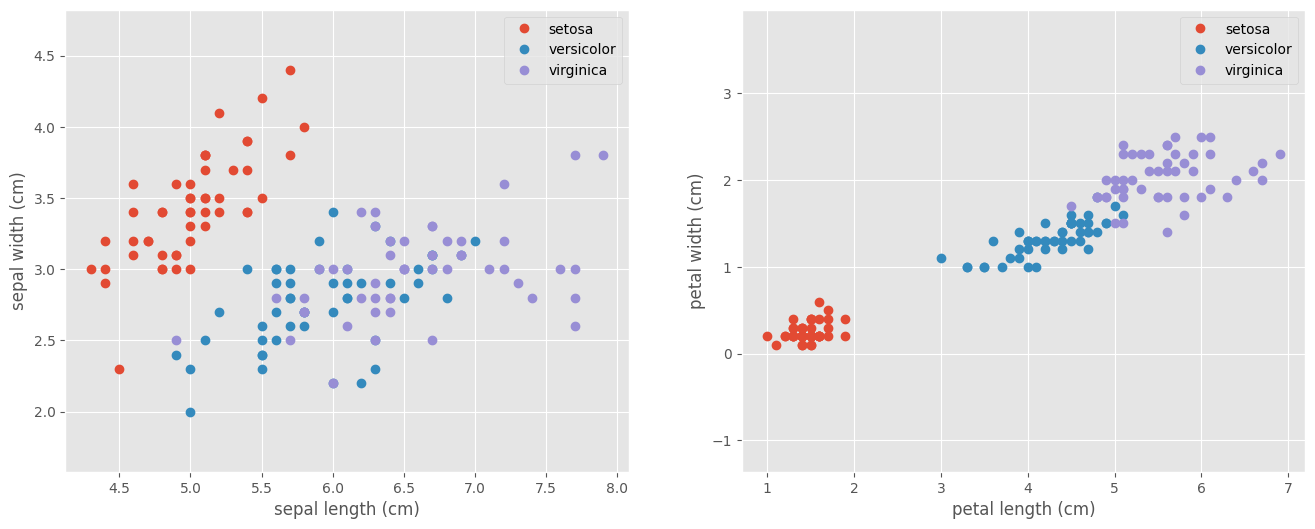

In [13]:
# Visualize the data sets
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.axis('equal')
plt.legend();

plt.subplot(1, 2, 2)
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    plt.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)
plt.xlabel(feature_names[2])
plt.ylabel(feature_names[3])
plt.axis('equal')
plt.legend()

## Define the model

In this step, I adopted the architecture shown here: https://www.kaggle.com/code/rushabhwadkar/deep-learning-with-keras-on-iris-dataset

In [14]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(10, input_dim=4, activation=tf.nn.relu, kernel_initializer='he_normal', 
                                kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(7, activation=tf.nn.relu, kernel_initializer='he_normal', 
                                kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(5, activation=tf.nn.relu, kernel_initializer='he_normal', 
                                kernel_regularizer=tf.keras.regularizers.l1_l2(l1=0.001, l2=0.001)))
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Train the model

In [15]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=700, batch_size=7)

Epoch 1/700


11/11 [==============================] - 1s 17ms/step - loss: 1.3384 - accuracy: 0.5067 - val_loss: 1.5174 - val_accuracy: 0.3333
Epoch 2/700
11/11 [==============================] - 0s 3ms/step - loss: 1.2922 - accuracy: 0.5733 - val_loss: 1.4224 - val_accuracy: 0.3467
Epoch 3/700
11/11 [==============================] - 0s 3ms/step - loss: 1.2598 - accuracy: 0.5467 - val_loss: 1.3031 - val_accuracy: 0.3600
Epoch 4/700
11/11 [==============================] - 0s 3ms/step - loss: 1.2645 - accuracy: 0.5733 - val_loss: 1.2127 - val_accuracy: 0.3733
Epoch 5/700
11/11 [==============================] - 0s 3ms/step - loss: 1.2841 - accuracy: 0.5467 - val_loss: 1.1259 - val_accuracy: 0.6667
Epoch 6/700
11/11 [==============================] - 0s 9ms/step - loss: 1.1651 - accuracy: 0.6267 - val_loss: 1.0611 - val_accuracy: 0.7200
Epoch 7/700
11/11 [==============================] - 0s 3ms/step - loss: 1.2406 - accuracy: 0.5600 - val_loss: 1.0096 - val_accuracy: 0.7467
Epoch 8/700
11/11 [=====

## Plot training

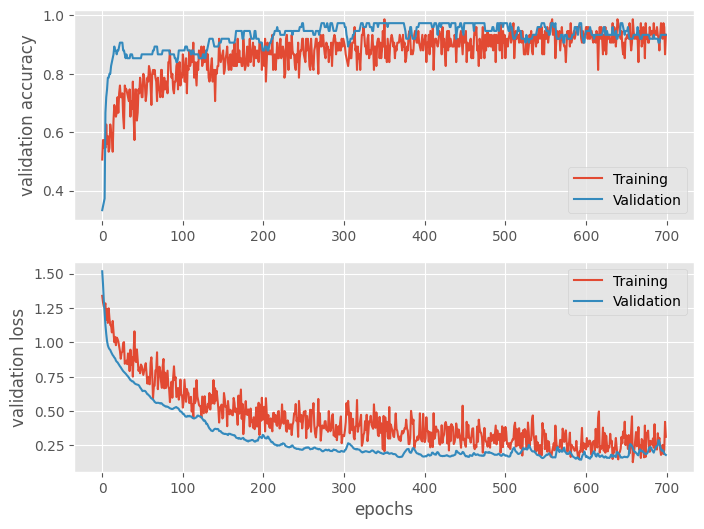

In [16]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

ax1.plot(history.history["accuracy"], label="Training")
ax1.plot(history.history["val_accuracy"], label="Validation")

ax2.plot(history.history["loss"], label="Training")
ax2.plot(history.history["val_loss"], label="Validation")
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()

## Export the model

In [17]:
tf.saved_model.save(
    model,
    export_dir="../model/1",
)

INFO:tensorflow:Assets written to: ../model/assets


INFO:tensorflow:Assets written to: ../model/assets
